In [4]:
!pip install pingouin

In [5]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
#from outliers import smirnov_grubbs as grubbs
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
import statsmodels.api as sm
import pingouin as pg
from scipy.stats import kstest
from scipy.stats import mannwhitneyu
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, classification_report

In [6]:
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### Расшифровка каждой колонки:

gender	– Пол учащегося — male (мальчик) или female (девочка).

race/ethnicity –	Этническая группа студента, закодирована как group A, group B, … group E.

parental level of education –	Максимальный уровень образования родителей (high school, bachelor’s degree, master’s degree).

lunch	Тип школьного питания – standard — обычный обед, free/reduced — льготный обед

test preparation course –	Проходил ли ученик подготовительный курс перед экзаменом (none или completed).

math score –	Балл по математике (от 0 до 100).

reading score –	Балл по чтению (от 0 до 100).

writing score –	Балл по письму (от 0 до 100).

In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# 1. Продемонстрировать применение для проверки различных гипотез и различных доверительных уровней (0.9, 0.95, 0.99) следующих критериев:
### a. Стьюдента, включая односторонние варианты, когда проверяемая нулевая гипотеза заключается в том, что одно из сравниваемых средних значений больше (или меньше) другого. Реализовать оценку мощности критериев при заданном объеме выборки или определения объема выборки для достижения заданной мощности;

Критерий Стьюдента применим для данных с нормальным распределением.

In [8]:
# тест Шапиро–Уилка
w_stat, p_value = stats.shapiro(df['math score'].sample(1000, random_state=0))
print(f"Shapiro–Wilk test: W={w_stat:.4f}, p-value={p_value:.4f}")


Shapiro–Wilk test: W=0.9932, p-value=0.0001


In [9]:
# тест Шапиро–Уилка
w_stat, p_value = stats.shapiro(df['reading score'].sample(1000, random_state=0))
print(f"Shapiro–Wilk test: W={w_stat:.4f}, p-value={p_value:.4f}")

Shapiro–Wilk test: W=0.9929, p-value=0.0001


In [10]:
# тест Шапиро–Уилка
w_stat, p_value = stats.shapiro(df['writing score'].sample(1000, random_state=0))
print(f"Shapiro–Wilk test: W={w_stat:.4f}, p-value={p_value:.4f}")

Shapiro–Wilk test: W=0.9920, p-value=0.0000


В нашем датасете данные не являются нормальными, поэтому сгенерируем их.

In [11]:
df_1 = np.random.normal(0, 1, 100)
df_2 = np.random.normal(1, 3, 200)
df_3 = np.random.normal(0, 5, 300)

Доверительный уровень 0.9

In [12]:
pg.ttest(df_1, df_2, alternative='two-sided', confidence=0.9)

,T,dof,alternative,p-val,CI90%,cohen-d,BF10,power
T-test,-4.716859,279.068898,two-sided,0.000004,"[-1.399371162893396, -0.6739564293797556]",0.444645,3958.34,0.951424


In [13]:
pg.ttest(df_1, df_3, alternative='two-sided', confidence=0.9)

,T,dof,alternative,p-val,CI90%,cohen-d,BF10,power
T-test,-1.037845,356.947153,two-sided,0.300045,"[-0.8458233022494225, 0.19242513213581422]",0.072504,0.212,0.096022


In [14]:
pg.ttest(df_2, df_3, alternative='two-sided', confidence=0.9)

,T,dof,alternative,p-val,CI90%,cohen-d,BF10,power
T-test,1.991031,478.335442,two-sided,0.047046,"[0.12230239806971245, 1.2976270240898309]",0.16255,0.691,0.427589


In [15]:
pg.ttest(df_1, df_2, alternative='greater', confidence=0.9)

,T,dof,alternative,p-val,CI90%,cohen-d,BF10,power
T-test,-4.716859,279.068898,greater,0.999998,"[-1.318989497875323, inf]",0.444645,0.0,6.927561e-08


In [16]:
pg.ttest(df_1, df_3, alternative='greater', confidence=0.9)

,T,dof,alternative,p-val,CI90%,cohen-d,BF10,power
T-test,-1.037845,356.947153,greater,0.849978,"[-0.7308615936433708, inf]",0.072504,0.425,0.011552


In [17]:
pg.ttest(df_2, df_3, alternative='greater', confidence=0.9)

,T,dof,alternative,p-val,CI90%,cohen-d,BF10,power
T-test,1.991031,478.335442,greater,0.023523,"[0.2523552918614484, inf]",0.16255,1.381,0.55305


Доверительный уровень 0.95

In [18]:
pg.ttest(df_1, df_2, alternative='two-sided', confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-4.716859,279.068898,two-sided,0.000004,"[-1.47, -0.6]",0.444645,3958.34,0.951424


In [19]:
pg.ttest(df_1, df_3, alternative='two-sided', confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.037845,356.947153,two-sided,0.300045,"[-0.95, 0.29]",0.072504,0.212,0.096022


In [20]:
pg.ttest(df_2, df_3, alternative='two-sided', confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.991031,478.335442,two-sided,0.047046,"[0.01, 1.41]",0.16255,0.691,0.427589


In [21]:
pg.ttest(df_1, df_2, alternative='greater', confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-4.716859,279.068898,greater,0.999998,"[-1.4, inf]",0.444645,0.0,6.927561e-08


In [22]:
pg.ttest(df_1, df_3, alternative='greater', confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.037845,356.947153,greater,0.849978,"[-0.85, inf]",0.072504,0.425,0.011552


In [23]:
pg.ttest(df_2, df_3, alternative='greater', confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.991031,478.335442,greater,0.023523,"[0.12, inf]",0.16255,1.381,0.55305


Доверительный уровень 0.99

In [24]:
pg.ttest(df_1, df_2, alternative='two-sided', confidence=0.99)

,T,dof,alternative,p-val,CI99%,cohen-d,BF10,power
T-test,-4.716859,279.068898,two-sided,0.000004,"[-1.6066725102740405, -0.46665508199911115]",0.444645,3958.34,0.951424


In [25]:
pg.ttest(df_1, df_3, alternative='two-sided', confidence=0.99)

,T,dof,alternative,p-val,CI99%,cohen-d,BF10,power
T-test,-1.037845,356.947153,two-sided,0.300045,"[-1.1418918563233391, 0.48849368620973077]",0.072504,0.212,0.096022


In [26]:
pg.ttest(df_2, df_3, alternative='two-sided', confidence=0.99)

,T,dof,alternative,p-val,CI99%,cohen-d,BF10,power
T-test,1.991031,478.335442,two-sided,0.047046,"[-0.21220697980903466, 1.6321364019685778]",0.16255,0.691,0.427589


In [27]:
pg.ttest(df_1, df_2, alternative='greater', confidence=0.99)

,T,dof,alternative,p-val,CI99%,cohen-d,BF10,power
T-test,-4.716859,279.068898,greater,0.999998,"[-1.550897847390588, inf]",0.444645,0.0,6.927561e-08


In [28]:
pg.ttest(df_1, df_3, alternative='greater', confidence=0.99)

,T,dof,alternative,p-val,CI99%,cohen-d,BF10,power
T-test,-1.037845,356.947153,greater,0.849978,"[-1.0623036444417453, inf]",0.072504,0.425,0.011552


In [29]:
pg.ttest(df_2, df_3, alternative='greater', confidence=0.99)

,T,dof,alternative,p-val,CI99%,cohen-d,BF10,power
T-test,1.991031,478.335442,greater,0.023523,"[-0.12235645656804622, inf]",0.16255,1.381,0.55305


### b. Уилкоксона-Манна-Уитни (ранговые);

В каждой из выборок должно быть не менее 3 значений признака. Допускается, чтобы в одной выборке было два значения, но во второй тогда не менее пяти.

В выборочных данных не должно быть совпадающих значений (все числа — разные) или таких совпадений должно быть очень мало (до 10).

Критерий проверяет гипотезу о том, что две независимые выборки имеют одно распределение. Альтернатива $-$ выборки имеют разные распределения или одно из них сдвинуто относительно другого

In [30]:
males = df[df['gender']=='male']['math score']
females = df[df['gender']=='female']['math score']

U, p = stats.mannwhitneyu(males, females, alternative='two-sided', method='asymptotic') # method='asymptotic' использует приближение нормальным распределением, игнорируя проблему повторов
print(f"U = {U}, p-value = {p:.4f}")

U = 147907.5, p-value = 0.0000


In [31]:
males = df[df['gender']=='male']['reading score']
females = df[df['gender']=='female']['reading score']

U, p = stats.mannwhitneyu(males, females, alternative='greater', method='asymptotic')
print(f"U = {U}, p-value = {p:.4f}")

U = 89168.0, p-value = 1.0000


### c. Фишера, Левене, Бартлетта, Флигнера-Килина (проверка гипотез об однородности дисперсий).

Проверяем гипотезу о том, что выборки имеют одинаковую дисперсию

1. Критерий Фишера

Две выборки должны быть из нормального распределения и независимы

In [32]:
df_1 = np.random.normal(0, 1, 100)
df_2 = np.random.normal(1, 1, 200)
df_3 = np.random.normal(0, 5, 300)

F статистика:

$ \frac{max(s_1^2, s_2^2)}{min(s_1^2, s_2^2)} $

In [33]:
def fisher(df_1, df_2):
    var_1 = np.var(df_1)
    var_2 = np.var(df_2)
    if var_1 >= var_2:
        value = var_1 / var_2
        len_1, len_2 = len(df_1) - 1, len(df_2) - 1
    else:
        value = var_2 / var_1
        len_1, len_2 = len(df_2) - 1, len(df_1) - 1

    p_value = 2 * min(stats.f.cdf(value, len_1, len_2), 1 - stats.f.cdf(value, len_1, len_2))

    return p_value


In [34]:
# p-value
print(1 - fisher(df_1, df_2))
print(1 - fisher(df_1, df_3))
print(1 - fisher(df_2, df_3))

0.7703853484097842
0.9999999999999998
0.9999999999999998


2. Критерий Левене

Может применяться для двух и более групп. Требуется случайность и независимость. Нет требования к нормальности, но мощность снижается при ненормальности

In [35]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [36]:
df_1 = df['math score']
df_2 = df['reading score']
df_3 = df['writing score']

In [37]:
print(stats.levene(df_1, df_2))
print(stats.levene(df_1, df_3))
print(stats.levene(df_2, df_3))

LeveneResult(statistic=np.float64(0.42684433922069576), pvalue=np.float64(0.5136166334995991))
LeveneResult(statistic=np.float64(0.14987760739481307), pvalue=np.float64(0.6986935799176699))
LeveneResult(statistic=np.float64(1.1158242864744805), pvalue=np.float64(0.29094707799701025))


3. Критерий Бартлетта

Данные должны быть нормально распределены

In [38]:
df_1 = np.random.normal(0, 1, 100)
df_2 = np.random.normal(1, 1, 200)
df_3 = np.random.normal(0, 5, 300)

In [39]:
print(stats.bartlett(df_1, df_2))
print(stats.bartlett(df_1, df_3))
print(stats.bartlett(df_2, df_3))

BartlettResult(statistic=np.float64(0.005619258458181775), pvalue=np.float64(0.940245174522454))
BartlettResult(statistic=np.float64(211.81327089171577), pvalue=np.float64(5.524200043205827e-48))
BartlettResult(statistic=np.float64(401.27871831630387), pvalue=np.float64(2.9011811530402275e-89))


4. Критерий Флигнера-Килина

Может применяться для двух и более групп. Требуется случайность и независимость. Нет требования к нормальности, мощность сохраняется

In [40]:
df_1 = df['math score']
df_2 = df['reading score']
df_3 = df['writing score']

In [41]:
print(stats.fligner(df_1, df_2))
print(stats.fligner(df_1, df_3))
print(stats.fligner(df_2, df_3))

FlignerResult(statistic=np.float64(0.4484873424070925), pvalue=np.float64(0.503054167975704))
FlignerResult(statistic=np.float64(0.14471408029409802), pvalue=np.float64(0.7036388371145267))
FlignerResult(statistic=np.float64(1.2195874223537169), pvalue=np.float64(0.26944163573778085))


# 2. Исследовать корреляционные взаимосвязи в данных с помощью коэффициентов корреляции Пирсона, Спирмена и Кендалла.

### 1. Коэффициент корреляции Пирсона

Коэффициент определяет линейную корреляцию между двумя наборами данных с непрерывными значениями. Он чувствителен к выбросам, требует независимость наблюдений

Для его применения мы должны предположить, что данные зависят друг от друга линейно.

In [42]:
col = ['math score', 'reading score', 'writing score']

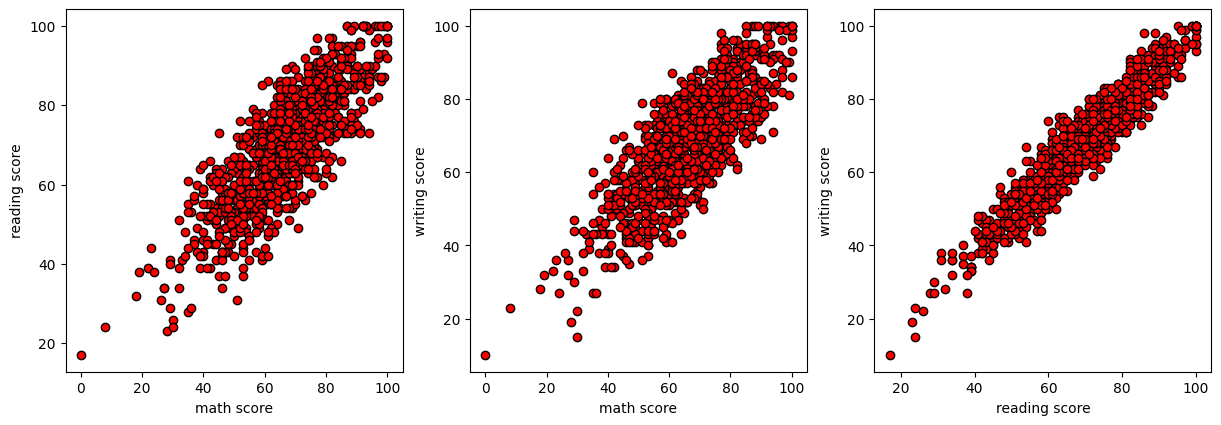

In [43]:
count = 0
plt.figure(figsize=(20, 16))
for i in range(0, len(col) - 1):
    for j in range(i + 1, len(col)):
        count += 1
        first = col[i]
        second = col[j]
        plt.subplot(3, 4, count)
        plt.scatter(df[first], df[second], color='red', edgecolor='black')
        plt.xlabel(first)
        plt.ylabel(second)

In [44]:
for i in range(0, len(col) - 1):
    for j in range(i + 1, len(col)):
        first = col[i]
        second = col[j]
        df_1 = df[first]
        df_2 = df[second]
        print(first, second, stats.pearsonr(df_1, df_2))

math score reading score PearsonRResult(statistic=np.float64(0.8175796636720541), pvalue=np.float64(1.7877531099061433e-241))
math score writing score PearsonRResult(statistic=np.float64(0.802642045949808), pvalue=np.float64(3.3760270425673703e-226))
reading score writing score PearsonRResult(statistic=np.float64(0.954598077146248), pvalue=np.float64(0.0))


### 2. Коэффициент корреляции Спирмена

Коэффициент корреляции Спирмена определяет монотонную корреляцию между данными.

Данные должны быть непрерывными и независимыми

In [45]:
for i in range(0, len(col) - 1):
    for j in range(i + 1, len(col)):
        first = col[i]
        second = col[j]
        df_1 = df[first]
        df_2 = df[second]
        print(first, second, stats.spearmanr(df_1, df_2))

math score reading score SignificanceResult(statistic=np.float64(0.8040638885551747), pvalue=np.float64(1.3538514946746025e-227))
math score writing score SignificanceResult(statistic=np.float64(0.7783385899971924), pvalue=np.float64(5.853058974157784e-204))
reading score writing score SignificanceResult(statistic=np.float64(0.9489525187100921), pvalue=np.float64(0.0))


### 3. Коэффициент корреляции Кендалла

Коэффициент корреляции Кендалла определяет монотонную корреляцию между данными.

Требует непрерывные, независимые данные

In [46]:
for i in range(0, len(col) - 1):
    for j in range(i + 1, len(col)):
        first = col[i]
        second = col[j]
        df_1 = df[first]
        df_2 = df[second]
        print(first, second, stats.kendalltau(df_1, df_2))

math score reading score SignificanceResult(statistic=np.float64(0.6174315114969301), pvalue=np.float64(4.927112331887677e-181))
math score writing score SignificanceResult(statistic=np.float64(0.5910667909973938), pvalue=np.float64(3.1385599774237974e-166))
reading score writing score SignificanceResult(statistic=np.float64(0.8200575427562821), pvalue=np.float64(0.0))


# 3. Продемонстрировать использование методов хи-квадрат, точного теста Фишера, теста МакНемара, Кохрана-Мантеля-Хензеля.

### 1. Метод $\chi ^2$

$\chi ^2$ подсчитывает частоты попаданий значений в категорию, поэтому для его применения нужны либо категориальные данные, либо группировка в непрерывных. В каждой группе минимум 5 значений. Требуем независимость наблюдений

In [47]:
df_1 = df['math score']
df_2 = df['reading score']
print(stats.chi2_contingency(pd.crosstab(df_1, df_2)))

Chi2ContingencyResult(statistic=np.float64(13446.995134204408), pvalue=np.float64(0.0), dof=5680, expected_freq=array([[0.001, 0.001, 0.002, ..., 0.005, 0.003, 0.017],
       [0.001, 0.001, 0.002, ..., 0.005, 0.003, 0.017],
       [0.001, 0.001, 0.002, ..., 0.005, 0.003, 0.017],
       ...,
       [0.003, 0.003, 0.006, ..., 0.015, 0.009, 0.051],
       [0.003, 0.003, 0.006, ..., 0.015, 0.009, 0.051],
       [0.007, 0.007, 0.014, ..., 0.035, 0.021, 0.119]]))


### 2. Точный тест Фишера

Предпочтительно использование в случаях, когда матрица имеет размер 2x2.

In [48]:
for i in df.columns:
    print(len(df[i].unique()), i)

2 gender
5 race/ethnicity
6 parental level of education
2 lunch
2 test preparation course
81 math score
72 reading score
77 writing score


In [49]:
df_1 = df['gender']
df_2 = df['lunch']
df_3 = df['test preparation course']
print(stats.fisher_exact(pd.crosstab(df_1, df_2)))
print(stats.fisher_exact(pd.crosstab(df_1, df_3)))
print(stats.fisher_exact(pd.crosstab(df_3, df_2)))

SignificanceResult(statistic=np.float64(1.0935657523711868), pvalue=np.float64(0.5090345270156171))
SignificanceResult(statistic=np.float64(0.9751531419918783), pvalue=np.float64(0.8949914298347688))
SignificanceResult(statistic=np.float64(1.0768958464443046), pvalue=np.float64(0.6295193216239263))


### 3. Тест МакНемара

Используется для парных номинальных данных. Пример: исследователь пытается определить, влияет ли лекарство на течение конкретного заболевания

Сгенерируем парные данные

In [50]:
before = np.random.choice([0, 1], 100, p=[0.9, 0.1])
after1 = np.random.choice([0, 1], 100, p=[0.91, 0.09])
after2 = np.random.choice([0, 1], 100, p=[0.5, 0.5])

In [51]:
from statsmodels.stats.contingency_tables import mcnemar

print(mcnemar(pd.crosstab(before, after1)))
print(mcnemar(pd.crosstab(before, after2)))

pvalue      0.30745625495910645
statistic   9.0
pvalue      2.5448598648836196e-05
statistic   8.0


### 4. Тест Кохрана-Мантеля-Хензеля

 В отличие от критерия Макнемара, который работает только с парами, критерий Кохрана-Мантеля-Хензеля работает с произвольным размером слоев

Бинаризируем числовые оценки

In [52]:
df['math_pass'] = (df['math score'] >= 50).astype(int)
df['reading_pass'] = (df['reading score'] >= 50).astype(int)

In [53]:
from statsmodels.stats.contingency_tables import StratifiedTable

tables = []
for g in df['gender'].unique():
    sub = df[df['gender'] == g]
    table = pd.crosstab(sub['math_pass'], sub['reading_pass'])
    tables.append(table.values)

strat_table = StratifiedTable(tables)
result = strat_table.test_null_odds()

print(f"CMH statistic = {result.statistic}")
print(f"p-value = {result.pvalue}")

CMH statistic = 265.4519271216579
p-value = 0.0


Так как p-value < 0.05, то можем сделать вывод, что существует статистически значимая связь между math_pass и reading_pass при контроле по полу

# 4. Проверить наличие мультиколлинеарности в данных с помощью корреляционной матрицы и фактора инфляции дисперсии.

### 1. Корреляционная матрица

В построении корреляционной матрицы участвуют только численные параметры. Преобразуем категориальные параметры.

In [54]:
df = pd.read_csv('StudentsPerformance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


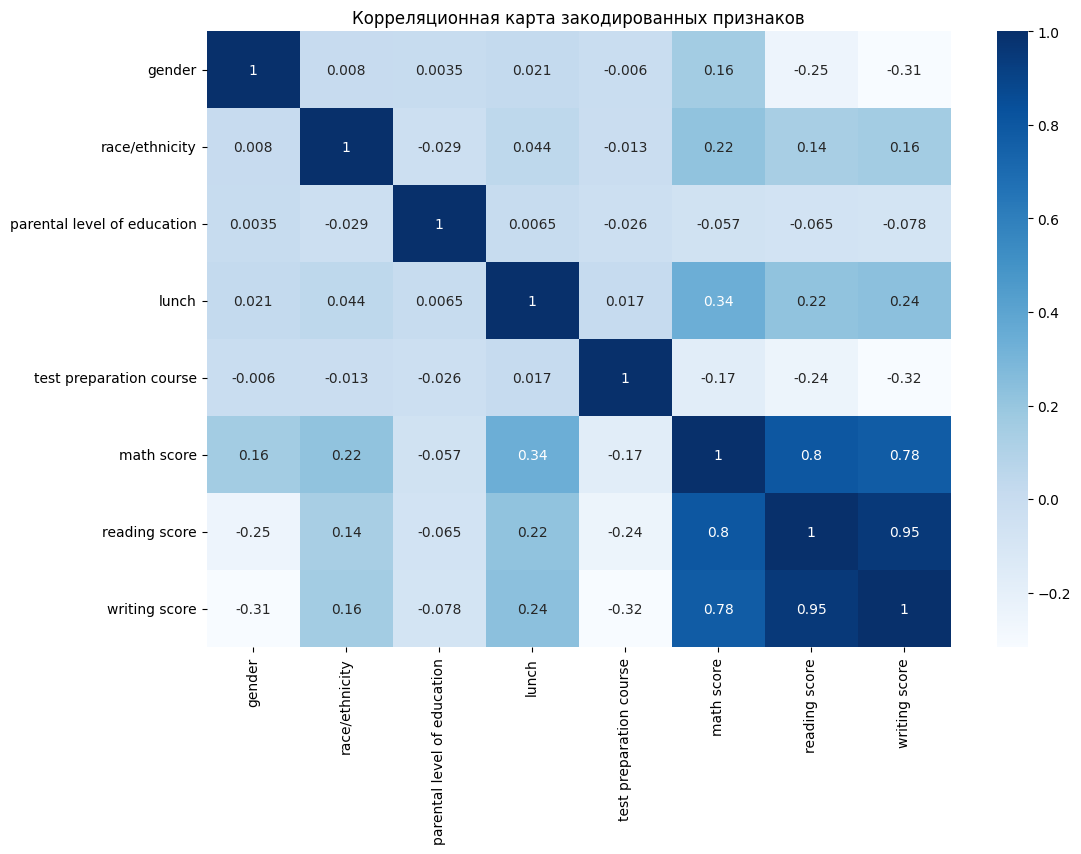

In [55]:
from sklearn.preprocessing import LabelEncoder

df_to_cor = df.copy()

categorical_cols = df_to_cor.select_dtypes(include=['object']).columns

encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_to_cor[col] = le.fit_transform(df_to_cor[col])

plt.figure(figsize=(12,8))
sns.heatmap(df_to_cor.corr(method='spearman'), annot=True, cmap=plt.cm.Blues)
plt.title('Корреляционная карта закодированных признаков')
plt.show()

### 2. Фактор инфляции дисперсии

Нужен для диагностики мультиколлинеарности. Он помогает понять, насколько сильно корреляция между независимыми переменными влияет на ошибку коэффициентов регрессии

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df_to_vif = df.copy()

categorical_cols = df_to_vif.select_dtypes(include=['object']).columns

encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_to_vif[col] = le.fit_transform(df_to_vif[col])

df_to_vif = df_to_vif.apply(pd.to_numeric)

X = add_constant(df_to_vif)

vif_series = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
                       index=X.columns)
vif_series

,0
const,46.603363
gender,2.571655
race/ethnicity,1.068748
parental level of education,1.015549
lunch,1.188998
test preparation course,1.277547
math score,7.513480
reading score,13.038138
writing score,16.619244


Мультиколлинеарность есть среди math score, reading score, writing score (Vif > 5)

# 5. Исследовать зависимости в данных с помощью дисперсионного анализа.

Дисперсионный анализ применяется для сравнения средних значений переменной в разных группах. Для применения остатки должны иметь около нормальное распределение, но при достаточно больших объемах данных и можно применять, если нет большого количества выбросов. Также дисперсии должны быть примерно равны

In [57]:
males = df[df['gender'] == 'male']['math score']
females = df[df['gender'] == 'female']['math score']

f_stat, p_value = stats.f_oneway(males, females)
print(f"F-statistic = {f_stat}, p-value = {p_value}")

F-statistic = 28.979336095030884, p-value = 9.120185549332254e-08


# 6. Подогнать регрессионные модели (в том числе, нелинейные) к данным, а также оценить качество подобной аппроксимации.

Воспользуемся полиномиальной логистической регрессией для предсказания gender. Для оценки модели будем использовать accuracy_score

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('StudentsPerformance.csv')

categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

X = df.drop('gender', axis=1)
y = df['gender']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=0)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

parameters = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['lbfgs', 'sag', 'saga'],
    'classifier__max_iter': [2000, 5000, 10000]
}

grid_search = GridSearchCV(pipeline, parameters, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_valid)

print("Accuracy:", accuracy_score(y_valid, y_pred))

Accuracy: 0.896
